In [192]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

import pandas as pd
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [193]:
df = pd.read_csv('../hand_gesture_data_2.csv')

In [194]:
display(df.head(10))
df.shape

,landmark_0_x,landmark_0_y,landmark_0_z,landmark_1_x,landmark_1_y,landmark_1_z,landmark_2_x,landmark_2_y,landmark_2_z,landmark_3_x,...,landmark_18_x,landmark_18_y,landmark_18_z,landmark_19_x,landmark_19_y,landmark_19_z,landmark_20_x,landmark_20_y,landmark_20_z,label
0,0.710527,0.728813,-1.496961e-07,0.667118,0.705512,-0.011782,0.627166,0.638956,-0.021043,0.615836,...,0.708684,0.499379,-0.050439,0.702188,0.550947,-0.040203,0.705958,0.576203,-0.027563,5
1,0.711059,0.737702,-1.752258e-07,0.667122,0.715834,-0.011645,0.625481,0.644563,-0.019507,0.614889,...,0.708650,0.506847,-0.048334,0.701693,0.561570,-0.038756,0.705658,0.589292,-0.026387,5
2,0.710045,0.745112,-1.821775e-07,0.665805,0.723275,-0.011025,0.624174,0.651982,-0.018627,0.613740,...,0.706822,0.512004,-0.048737,0.700279,0.567938,-0.038562,0.704962,0.594103,-0.025846,5
3,0.713468,0.746726,-1.763298e-07,0.669152,0.722939,-0.011491,0.627151,0.651960,-0.019669,0.616168,...,0.709175,0.513166,-0.049157,0.703064,0.569413,-0.039284,0.707392,0.596199,-0.026562,5
4,0.716172,0.753647,-1.793305e-07,0.672199,0.729461,-0.010641,0.630196,0.657548,-0.018770,0.620393,...,0.712607,0.520079,-0.050576,0.706930,0.576696,-0.039656,0.713524,0.599080,-0.026340,5
5,0.717132,0.757046,-1.782498e-07,0.672734,0.731984,-0.012338,0.630637,0.660793,-0.021078,0.619684,...,0.711499,0.525887,-0.049694,0.705702,0.581417,-0.039826,0.711641,0.605683,-0.027117,5
6,0.715407,0.755243,-1.708976e-07,0.671170,0.730216,-0.012389,0.629951,0.659348,-0.021348,0.619102,...,0.710779,0.523687,-0.049449,0.704831,0.578850,-0.039275,0.710627,0.602696,-0.026410,5
7,0.715393,0.754784,-1.730673e-07,0.670475,0.730258,-0.012219,0.628715,0.659144,-0.020777,0.618451,...,0.709026,0.523350,-0.048861,0.703251,0.578958,-0.038874,0.709090,0.603083,-0.026086,5
8,0.714998,0.754770,-1.738013e-07,0.669784,0.730360,-0.012259,0.627981,0.659699,-0.020995,0.617334,...,0.708143,0.522984,-0.049317,0.702513,0.578646,-0.039150,0.708167,0.603060,-0.026260,5
9,0.714256,0.754647,-1.766362e-07,0.669212,0.730120,-0.012164,0.627458,0.659500,-0.020847,0.617050,...,0.708417,0.522078,-0.049763,0.702738,0.577565,-0.039297,0.708564,0.601945,-0.026235,5


(7550, 64)

In [195]:
df.label.unique() # Check out analyses.py for the label distribution

array([5, 1, 2, 3, 4, 0])

In [196]:
df['label'].dtype

dtype('int64')

In [197]:
df.columns

Index(['landmark_0_x', 'landmark_0_y', 'landmark_0_z', 'landmark_1_x',
       'landmark_1_y', 'landmark_1_z', 'landmark_2_x', 'landmark_2_y',
       'landmark_2_z', 'landmark_3_x', 'landmark_3_y', 'landmark_3_z',
       'landmark_4_x', 'landmark_4_y', 'landmark_4_z', 'landmark_5_x',
       'landmark_5_y', 'landmark_5_z', 'landmark_6_x', 'landmark_6_y',
       'landmark_6_z', 'landmark_7_x', 'landmark_7_y', 'landmark_7_z',
       'landmark_8_x', 'landmark_8_y', 'landmark_8_z', 'landmark_9_x',
       'landmark_9_y', 'landmark_9_z', 'landmark_10_x', 'landmark_10_y',
       'landmark_10_z', 'landmark_11_x', 'landmark_11_y', 'landmark_11_z',
       'landmark_12_x', 'landmark_12_y', 'landmark_12_z', 'landmark_13_x',
       'landmark_13_y', 'landmark_13_z', 'landmark_14_x', 'landmark_14_y',
       'landmark_14_z', 'landmark_15_x', 'landmark_15_y', 'landmark_15_z',
       'landmark_16_x', 'landmark_16_y', 'landmark_16_z', 'landmark_17_x',
       'landmark_17_y', 'landmark_17_z', 'landmark_18_x

In [198]:
X, y = df.drop('label', axis=1), df['label']
X.shape, y.shape

((7550, 63), (7550,))

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9)

In [200]:
scaler = StandardScaler()
X_train, X_test = scaler.fit_transform(X_train), scaler.transform(X_test)

In [201]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [202]:
y_train, y_test = y_train.to_numpy(), y_test.to_numpy()

In [203]:
X_train, X_test = torch.from_numpy(X_train).to(torch.float32), torch.from_numpy(X_test).to(torch.float32)
y_train, y_test = torch.from_numpy(y_train).to(torch.float32), torch.from_numpy(y_test).to(torch.float32)

In [204]:
type(X_train), type(X_test), type(y_train), type(y_test)

(torch.Tensor, torch.Tensor, torch.Tensor, torch.Tensor)

In [205]:
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

In [206]:
batch_size = 128
epochs = 2000
lr = 0.0001

loss_fn = nn.CrossEntropyLoss() # Apply softmax at the last layer


In [207]:
train_batch = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_batch = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

In [208]:
X_train.shape, 

(torch.Size([6795, 63]),)

In [209]:
class SignModel(nn.Module):
    def __init__(self, input_shape=63, dropout_rate=0.5):
        super(SignModel, self).__init__()
        # Layer 1
        self.fc1 = nn.Linear(input_shape, 256) # Increased neurons
        self.dropout1 = nn.Dropout(dropout_rate)

        # Layer 2
        self.fc2 = nn.Linear(256, 128) # Increased neurons
        self.dropout2 = nn.Dropout(dropout_rate)
        
        # Layer 3
        self.fc3 = nn.Linear(128, 64) # Added a new layer with more neurons
        self.dropout3 = nn.Dropout(dropout_rate)
        
        # Layer 4
        self.fc4 = nn.Linear(64, 32) # Added a new layer with more neurons
        self.dropout4 = nn.Dropout(dropout_rate)

        # Output Layer
        self.fc5 = nn.Linear(32, 6) # Output layer

    def forward(self, x):
        # Pass through the layers with ReLU and Dropout
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        
        x = F.relu(self.fc3(x))
        x = self.dropout3(x)
        
        x = F.relu(self.fc4(x))
        x = self.dropout4(x)
        
        # Output layer with softmax
        x = F.softmax(self.fc5(x), dim=1) # dim=1 is important for multi-class classification

        return x


In [210]:
model = SignModel()
optimizer = optim.Adam(model.parameters(), lr=lr)
model

SignModel(
  (fc1): Linear(in_features=63, out_features=256, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (dropout3): Dropout(p=0.5, inplace=False)
  (fc4): Linear(in_features=64, out_features=32, bias=True)
  (dropout4): Dropout(p=0.5, inplace=False)
  (fc5): Linear(in_features=32, out_features=6, bias=True)
)

In [211]:
loss_history  = []
for epoch in range(epochs):
    model.train()
    running_loss = 0

    for feature, label in train_batch:
        output = model(feature).squeeze()

        label = label.long()

        loss = loss_fn(output, label)
        running_loss+=loss.item()
    
        optimizer.zero_grad()

        loss.backward()
        optimizer.step()

    loss_history.append(running_loss)

    print(f"{epoch} : {running_loss}")

0 : 96.73965179920197
1 : 96.53918039798737
2 : 96.04668474197388
3 : 94.09757769107819
4 : 90.26463103294373
5 : 86.58580279350281
6 : 84.03253471851349
7 : 82.55427515506744
8 : 81.55850982666016
9 : 80.2402069568634
10 : 79.09712731838226
11 : 78.11830508708954
12 : 76.70320200920105
13 : 75.75414860248566
14 : 74.73540997505188
15 : 74.14438307285309
16 : 73.74070417881012
17 : 72.91183423995972
18 : 72.41231882572174
19 : 72.0021026134491
20 : 71.3346415758133
21 : 70.75795614719391
22 : 70.57162010669708
23 : 70.12918305397034
24 : 69.68151903152466
25 : 69.00725018978119
26 : 68.85193800926208
27 : 68.27361130714417
28 : 68.16675996780396
29 : 67.657585978508
30 : 67.52347207069397
31 : 66.79185557365417
32 : 66.76776432991028
33 : 66.21461284160614
34 : 65.85065448284149
35 : 65.73866844177246
36 : 65.40620410442352
37 : 65.46505069732666
38 : 64.94351649284363
39 : 65.03685772418976
40 : 64.56178891658783
41 : 64.20386683940887
42 : 64.43314063549042
43 : 64.37001061439514
44 

In [212]:
len(loss_history), loss_history

(2000,
 [96.73965179920197,
  96.53918039798737,
  96.04668474197388,
  94.09757769107819,
  90.26463103294373,
  86.58580279350281,
  84.03253471851349,
  82.55427515506744,
  81.55850982666016,
  80.2402069568634,
  79.09712731838226,
  78.11830508708954,
  76.70320200920105,
  75.75414860248566,
  74.73540997505188,
  74.14438307285309,
  73.74070417881012,
  72.91183423995972,
  72.41231882572174,
  72.0021026134491,
  71.3346415758133,
  70.75795614719391,
  70.57162010669708,
  70.12918305397034,
  69.68151903152466,
  69.00725018978119,
  68.85193800926208,
  68.27361130714417,
  68.16675996780396,
  67.657585978508,
  67.52347207069397,
  66.79185557365417,
  66.76776432991028,
  66.21461284160614,
  65.85065448284149,
  65.73866844177246,
  65.40620410442352,
  65.46505069732666,
  64.94351649284363,
  65.03685772418976,
  64.56178891658783,
  64.20386683940887,
  64.43314063549042,
  64.37001061439514,
  63.85328996181488,
  63.65066480636597,
  63.253984212875366,
  63.07590

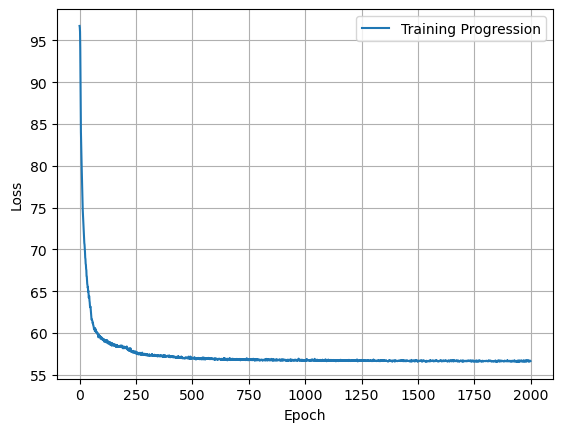

In [213]:
epoch_history = [i for i in range(epochs)]

plt.plot(epoch_history, loss_history, label=["Training Progression"])
plt.grid(True)
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.legend()

In [214]:
path = "./SignModel.pth"
torch.save(model.state_dict(), path)